<a href="https://colab.research.google.com/github/m-allahkhani/computer_vision_pro2/blob/main/ComputerVisionPro2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from torch.utils.data import DataLoader
import torch
import torchvision
import torch.nn as nn
from tqdm import trange
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.models import resnet18, mobilenet_v2, googlenet


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
device

device(type='cuda')

In [ ]:
def get_mnist():
    # Load the MNIST dataset
    train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
    test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=torchvision.transforms.ToTensor())
    return train_dataset, test_dataset

In [ ]:
class cnn_phase1_relu_l3(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            # layer 1
            torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(num_features=64),
            torch.nn.ReLU(),

            # layer 2
            torch.nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(num_features=96),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2,stride=2),
            # layer 3
            torch.nn.Conv2d(in_channels=96, out_channels=128, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(num_features=128),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2,stride=2),
            # linear layer
            nn.Flatten(),
            nn.Linear(128*7*7, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)


In [ ]:
class cnn_phase1_sig_l3(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            # layer 1
            torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(num_features=64),
            torch.nn.Sigmoid(),
            torch.nn.MaxPool2d(kernel_size=2,stride=2),
            # layer 2
            torch.nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(num_features=96),
            torch.nn.Sigmoid(),
            torch.nn.MaxPool2d(kernel_size=2,stride=2),
            # linear layer
            nn.Flatten(),
            nn.Linear(96*7*7, 64),
            nn.Sigmoid(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)


In [ ]:
class cnn_phase1_relu_l4(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            # layer 1
            torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(num_features=64),
            torch.nn.ReLU(),

            # layer 2
            torch.nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(num_features=96),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2,stride=2),
            # layer 3
            torch.nn.Conv2d(in_channels=96, out_channels=128, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(num_features=128),
            torch.nn.ReLU(),
            torch.nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(num_features=128),
            torch.nn.ReLU(),
            torch.nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(num_features=128),
            torch.nn.ReLU(),
            torch.nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(num_features=128),
            torch.nn.ReLU(),
            # layer 4
            torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(num_features=256),
            torch.nn.ReLU(),
            torch.nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(num_features=256),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2,stride=2),
            # linear layer
            nn.Flatten(),
            nn.Linear(256*7*7, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)


In [ ]:
class cnn_phase1_sig_l4(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            # layer 1
            torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(num_features=64),
            torch.nn.Sigmoid(),

            # layer 2
            torch.nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(num_features=96),
            torch.nn.Sigmoid(),
            torch.nn.MaxPool2d(kernel_size=2,stride=2),
            # layer 3
            torch.nn.Conv2d(in_channels=96, out_channels=128, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(num_features=128),
            torch.nn.Sigmoid(),
            # layer 4
            torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(num_features=256),
            torch.nn.Sigmoid(),
            torch.nn.MaxPool2d(kernel_size=2,stride=2),
            # linear layer
            nn.Flatten(),
            nn.Linear(256*7*7, 64),
            nn.Sigmoid(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)


In [ ]:
class cnn_phase1_relu_l2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            # layer 1
            torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(num_features=64),
            torch.nn.ReLU(),

            # layer 2
            torch.nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(num_features=96),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2,stride=2),

            # linear layer
            nn.Flatten(),
            nn.Linear(96*14*14, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)


In [ ]:
class cnn_phase1_sig_l2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            # layer 1
            torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(num_features=64),
            torch.nn.Sigmoid(),

            # layer 2
            torch.nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(num_features=96),
            torch.nn.Sigmoid(),


            # linear layer
            nn.Flatten(),
            nn.Linear(96*28*28, 64),
            nn.Sigmoid(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)


In [ ]:
def train_one_epoch(model: nn.Module, optim: torch.optim.Optimizer,
         dataloader: DataLoader, loss_fn):
    num_samples = len(dataloader.dataset)
    num_batches = len(dataloader)
    running_corrects = 0
    running_loss = 0.0

    model.train()

    for batch_indx, (inputs, targets) in enumerate(dataloader): # Get a batch of Data
        inputs = inputs.to(device)
        targets = targets.to(device)

        outputs = model(inputs) # Forward Pass, [N, 10]
        loss = loss_fn(outputs, targets) # Compute Loss

        loss.backward() # Compute Gradients
        optim.step() # Update parameters
        optim.zero_grad() # zero the parameter's gradients

        _, preds = torch.max(outputs, dim=1) # Explain, [N]
        running_corrects += torch.sum(preds == targets)
        running_loss += loss.item()

        if batch_indx == 0:
            print(outputs.device)

    epoch_acc = (running_corrects / num_samples) * 100
    epoch_loss = (running_loss / num_batches)

    return epoch_acc, epoch_loss

In [ ]:
def test_model(model: nn.Module,
         dataloader: DataLoader, loss_fn):

    # utils
    num_samples = len(dataloader.dataset)
    num_batches = len(dataloader)
    running_corrects = 0
    running_loss = 0.0

    model.eval() # you must call `model.eval()` to set dropout and batch normalization layers to evaluation mode before running inference.
    with torch.no_grad(): # explain
        # more on torch.no_grad(): https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html#disabling-gradient-tracking

        for batch_indx, (inputs, targets) in enumerate(dataloader): # Get a batch of Data
            inputs = inputs.to(device)
            targets = targets.to(device)

            outputs = model(inputs) # Forward Pass
            loss = loss_fn(outputs, targets) # Compute Loss

            # loss.backward() # Compute Gradients
            # optim.step() # Update parameters
            # optim.zero_grad() # zero the parameter's gradients

            _, preds = torch.max(outputs, 1) #
            running_corrects += torch.sum(preds == targets)
            running_loss += loss.item()


            if batch_indx == 0:
                print(outputs.device)

    test_acc = (running_corrects / num_samples) * 100
    test_loss = (running_loss / num_batches)

    return test_acc, test_loss

In [ ]:
def plot_learning_curves(acc_history_test,acc_history_train, loss_history_test,loss_history_train, title='Learning Curves'):
    epochs = range(1, len(acc_history_train) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc_history_train, label='Training Accuracy', marker='o')
    plt.plot(epochs, acc_history_test, label='Testing Accuracy', marker='o')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss_history_train, label='Training Loss', marker='o')
    plt.plot(epochs, loss_history_test, label='Testing Loss', marker='o')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


In [ ]:
def phase1(): #relu-l3
    batch_size = 32
    num_epochs = 10
    learning_rate = 0.0001
    train_dataset, test_dataset = get_mnist()
    model = cnn_phase1_relu_l3()
    model = model.to(device)
    full_dataloaders = {
        'train': DataLoader(train_dataset, batch_size=batch_size, shuffle=True),
        'test': DataLoader(test_dataset, batch_size=batch_size)
    }
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    cross_entropy = nn.CrossEntropyLoss()

    loss_history_train = []
    loss_history_test = []
    acc_history_test = []
    acc_history_train = []

    for epoch in trange(num_epochs):
        train_acc, train_loss = train_one_epoch(model=model, optim=optimizer, dataloader=full_dataloaders['train'], loss_fn=cross_entropy)
        test_acc, test_loss = test_model(model=model, dataloader=full_dataloaders['test'], loss_fn=cross_entropy)

        acc_history_train.append(train_acc)
        acc_history_test.append(test_acc)
        loss_history_train.append(train_loss)
        loss_history_test.append(test_loss)

    acc_history_train =  [round(float(tensor.cpu()), 4) for tensor in acc_history_train]
    acc_history_test =  [round(float(tensor.cpu()), 4) for tensor in acc_history_test]

    plot_learning_curves(acc_history_test,acc_history_train, loss_history_test,loss_history_train,title='Learning Curves')


100%|██████████| 9912422/9912422 [00:00<00:00, 101009497.63it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 41843072.13it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 34433459.12it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6034377.18it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/10 [00:00<?, ?it/s]

cuda:0
cuda:0


 10%|█         | 1/10 [00:18<02:48, 18.70s/it]

cuda:0
cuda:0


 20%|██        | 2/10 [00:35<02:19, 17.38s/it]

cuda:0
cuda:0


 30%|███       | 3/10 [00:51<01:58, 16.96s/it]

cuda:0
cuda:0


 40%|████      | 4/10 [01:08<01:41, 16.88s/it]

cuda:0
cuda:0


 50%|█████     | 5/10 [01:24<01:23, 16.74s/it]

cuda:0
cuda:0


 60%|██████    | 6/10 [01:41<01:07, 16.80s/it]

cuda:0
cuda:0


 70%|███████   | 7/10 [01:58<00:50, 16.76s/it]

cuda:0
cuda:0


 80%|████████  | 8/10 [02:15<00:33, 16.83s/it]

cuda:0
cuda:0


 90%|█████████ | 9/10 [02:32<00:16, 16.76s/it]

cuda:0
cuda:0


100%|██████████| 10/10 [02:48<00:00, 16.86s/it]


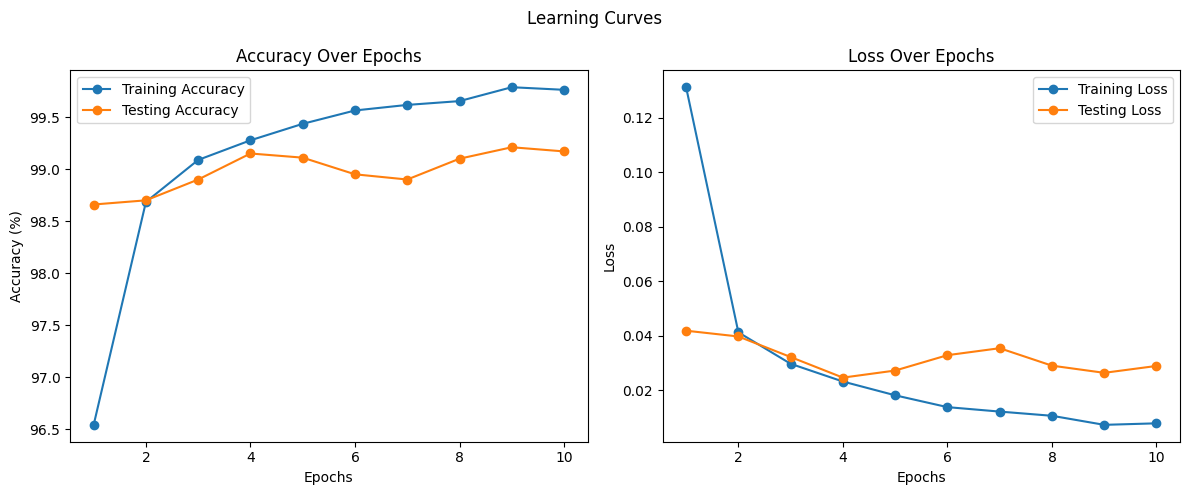

In [ ]:
phase1() #relu l3

In [ ]:
def phase1_relu_l2():
    batch_size = 32
    num_epochs = 10
    learning_rate = 0.0001
    train_dataset, test_dataset = get_mnist()
    model = cnn_phase1_relu_l2()
    model = model.to(device)
    full_dataloaders = {
        'train': DataLoader(train_dataset, batch_size=batch_size, shuffle=True),
        'test': DataLoader(test_dataset, batch_size=batch_size)
    }
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    cross_entropy = nn.CrossEntropyLoss()

    loss_history_train = []
    loss_history_test = []
    acc_history_test = []
    acc_history_train = []

    for epoch in trange(num_epochs):
        train_acc, train_loss = train_one_epoch(model=model, optim=optimizer, dataloader=full_dataloaders['train'], loss_fn=cross_entropy)
        test_acc, test_loss = test_model(model=model, dataloader=full_dataloaders['test'], loss_fn=cross_entropy)

        acc_history_train.append(train_acc)
        acc_history_test.append(test_acc)
        loss_history_train.append(train_loss)
        loss_history_test.append(test_loss)

    acc_history_train =  [round(float(tensor.cpu()), 4) for tensor in acc_history_train]
    acc_history_test =  [round(float(tensor.cpu()), 4) for tensor in acc_history_test]

    plot_learning_curves(acc_history_test,acc_history_train, loss_history_test,loss_history_train,title='Learning Curves')


  0%|          | 0/10 [00:00<?, ?it/s]

cuda:0
cuda:0


 10%|█         | 1/10 [00:14<02:14, 14.93s/it]

cuda:0
cuda:0


 20%|██        | 2/10 [00:29<01:57, 14.72s/it]

cuda:0
cuda:0


 30%|███       | 3/10 [00:45<01:45, 15.10s/it]

cuda:0
cuda:0


 40%|████      | 4/10 [01:04<01:39, 16.64s/it]

cuda:0
cuda:0


 50%|█████     | 5/10 [01:20<01:22, 16.53s/it]

cuda:0
cuda:0


 60%|██████    | 6/10 [01:38<01:08, 17.22s/it]

cuda:0
cuda:0


 70%|███████   | 7/10 [01:54<00:50, 16.78s/it]

cuda:0
cuda:0


 80%|████████  | 8/10 [02:15<00:36, 18.10s/it]

cuda:0
cuda:0


 90%|█████████ | 9/10 [02:31<00:17, 17.23s/it]

cuda:0
cuda:0


100%|██████████| 10/10 [02:47<00:00, 16.71s/it]


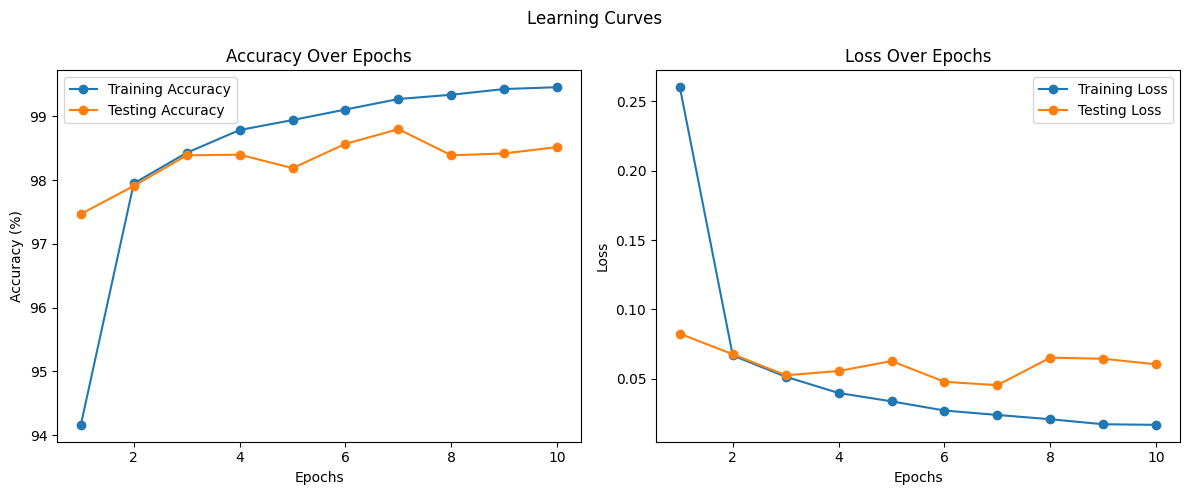

In [ ]:
phase1_relu_l2()

In [ ]:
def phase1_relu_l4():
    batch_size = 32
    num_epochs = 10
    learning_rate = 0.0001
    train_dataset, test_dataset = get_mnist()
    model = cnn_phase1_relu_l4()
    model = model.to(device)
    full_dataloaders = {
        'train': DataLoader(train_dataset, batch_size=batch_size, shuffle=True),
        'test': DataLoader(test_dataset, batch_size=batch_size)
    }
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    cross_entropy = nn.CrossEntropyLoss()

    loss_history_train = []
    loss_history_test = []
    acc_history_test = []
    acc_history_train = []

    for epoch in trange(num_epochs):
        train_acc, train_loss = train_one_epoch(model=model, optim=optimizer, dataloader=full_dataloaders['train'], loss_fn=cross_entropy)
        test_acc, test_loss = test_model(model=model, dataloader=full_dataloaders['test'], loss_fn=cross_entropy)

        acc_history_train.append(train_acc)
        acc_history_test.append(test_acc)
        loss_history_train.append(train_loss)
        loss_history_test.append(test_loss)

    acc_history_train =  [round(float(tensor.cpu()), 4) for tensor in acc_history_train]
    acc_history_test =  [round(float(tensor.cpu()), 4) for tensor in acc_history_test]

    plot_learning_curves(acc_history_test,acc_history_train, loss_history_test,loss_history_train,title='Learning Curves')


  0%|          | 0/10 [00:00<?, ?it/s]

cuda:0
cuda:0


 10%|█         | 1/10 [00:33<04:59, 33.24s/it]

cuda:0
cuda:0


 20%|██        | 2/10 [01:07<04:32, 34.11s/it]

cuda:0
cuda:0


 30%|███       | 3/10 [01:41<03:55, 33.64s/it]

cuda:0
cuda:0


 40%|████      | 4/10 [02:15<03:23, 33.84s/it]

cuda:0
cuda:0


 50%|█████     | 5/10 [02:48<02:47, 33.57s/it]

cuda:0
cuda:0


 60%|██████    | 6/10 [03:21<02:13, 33.42s/it]

cuda:0
cuda:0


 70%|███████   | 7/10 [03:58<01:43, 34.57s/it]

cuda:0
cuda:0


 80%|████████  | 8/10 [04:31<01:08, 34.16s/it]

cuda:0
cuda:0


 90%|█████████ | 9/10 [05:04<00:33, 33.77s/it]

cuda:0
cuda:0


100%|██████████| 10/10 [05:37<00:00, 33.76s/it]


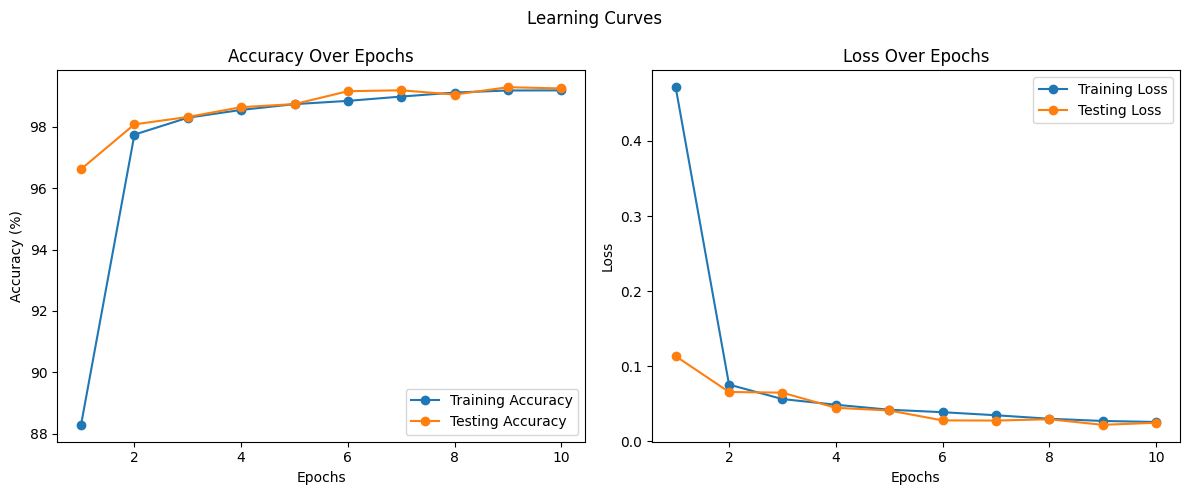

In [ ]:
phase1_relu_l4()

In [ ]:
def phase1_sig_l2():
    batch_size = 32
    num_epochs = 10
    learning_rate = 0.0001
    train_dataset, test_dataset = get_mnist()
    model = cnn_phase1_sig_l2()
    model = model.to(device)
    full_dataloaders = {
        'train': DataLoader(train_dataset, batch_size=batch_size, shuffle=True),
        'test': DataLoader(test_dataset, batch_size=batch_size)
    }
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    cross_entropy = nn.CrossEntropyLoss()

    loss_history_train = []
    loss_history_test = []
    acc_history_test = []
    acc_history_train = []

    for epoch in trange(num_epochs):
        train_acc, train_loss = train_one_epoch(model=model, optim=optimizer, dataloader=full_dataloaders['train'], loss_fn=cross_entropy)
        test_acc, test_loss = test_model(model=model, dataloader=full_dataloaders['test'], loss_fn=cross_entropy)

        acc_history_train.append(train_acc)
        acc_history_test.append(test_acc)
        loss_history_train.append(train_loss)
        loss_history_test.append(test_loss)

    acc_history_train =  [round(float(tensor.cpu()), 4) for tensor in acc_history_train]
    acc_history_test =  [round(float(tensor.cpu()), 4) for tensor in acc_history_test]

    plot_learning_curves(acc_history_test,acc_history_train, loss_history_test,loss_history_train,title='Learning Curves')


  0%|          | 0/10 [00:00<?, ?it/s]

cuda:0
cuda:0


 10%|█         | 1/10 [00:17<02:39, 17.72s/it]

cuda:0
cuda:0


 20%|██        | 2/10 [00:34<02:19, 17.44s/it]

cuda:0
cuda:0


 30%|███       | 3/10 [00:52<02:02, 17.54s/it]

cuda:0
cuda:0


 40%|████      | 4/10 [01:10<01:46, 17.77s/it]

cuda:0
cuda:0


 50%|█████     | 5/10 [01:28<01:28, 17.71s/it]

cuda:0
cuda:0


 60%|██████    | 6/10 [01:45<01:10, 17.58s/it]

cuda:0
cuda:0


 70%|███████   | 7/10 [02:03<00:52, 17.61s/it]

cuda:0
cuda:0


 80%|████████  | 8/10 [02:20<00:35, 17.51s/it]

cuda:0
cuda:0


 90%|█████████ | 9/10 [02:38<00:17, 17.52s/it]

cuda:0
cuda:0


100%|██████████| 10/10 [02:55<00:00, 17.55s/it]


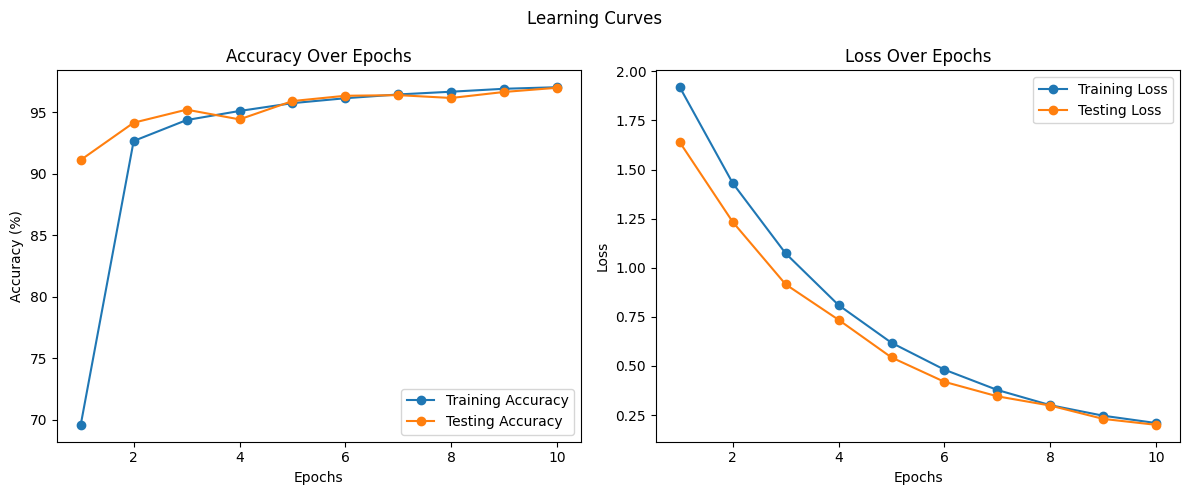

In [ ]:
phase1_sig_l2()

In [ ]:
def phase1_sig_l3():
    batch_size = 64
    num_epochs = 10
    learning_rate = 0.005
    train_dataset, test_dataset = get_mnist()
    model = cnn_phase1_sig_l3()
    model = model.to(device)
    full_dataloaders = {
        'train': DataLoader(train_dataset, batch_size=batch_size, shuffle=True),
        'test': DataLoader(test_dataset, batch_size=batch_size)
    }
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    cross_entropy = nn.CrossEntropyLoss()

    loss_history_train = []
    loss_history_test = []
    acc_history_test = []
    acc_history_train = []

    for epoch in trange(num_epochs):
        train_acc, train_loss = train_one_epoch(model=model, optim=optimizer, dataloader=full_dataloaders['train'], loss_fn=cross_entropy)
        test_acc, test_loss = test_model(model=model, dataloader=full_dataloaders['test'], loss_fn=cross_entropy)

        acc_history_train.append(train_acc)
        acc_history_test.append(test_acc)
        loss_history_train.append(train_loss)
        loss_history_test.append(test_loss)

    acc_history_train =  [round(float(tensor.cpu()), 4) for tensor in acc_history_train]
    acc_history_test =  [round(float(tensor.cpu()), 4) for tensor in acc_history_test]

    plot_learning_curves(acc_history_test,acc_history_train, loss_history_test,loss_history_train,title='Learning Curves')


  0%|          | 0/10 [00:00<?, ?it/s]

cuda:0
cuda:0


 10%|█         | 1/10 [00:11<01:45, 11.68s/it]

cuda:0
cuda:0


 20%|██        | 2/10 [00:23<01:33, 11.63s/it]

cuda:0
cuda:0


 30%|███       | 3/10 [00:37<01:28, 12.60s/it]

cuda:0
cuda:0


 40%|████      | 4/10 [00:48<01:13, 12.21s/it]

cuda:0
cuda:0


 50%|█████     | 5/10 [01:00<00:59, 11.98s/it]

cuda:0
cuda:0


 60%|██████    | 6/10 [01:11<00:47, 11.86s/it]

cuda:0
cuda:0


 70%|███████   | 7/10 [01:24<00:36, 12.02s/it]

cuda:0
cuda:0


 80%|████████  | 8/10 [01:35<00:23, 11.92s/it]

cuda:0
cuda:0


 90%|█████████ | 9/10 [01:47<00:11, 11.85s/it]

cuda:0
cuda:0


100%|██████████| 10/10 [01:59<00:00, 11.92s/it]


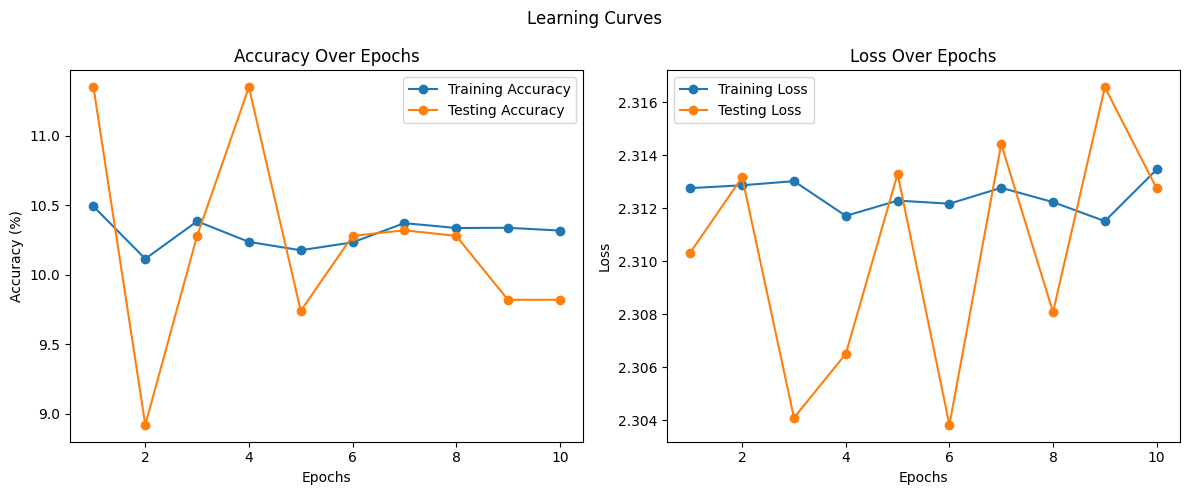

In [ ]:
phase1_sig_l3()

In [ ]:
def phase1_sig_l4():
    batch_size = 64
    num_epochs = 10
    learning_rate = 0.005
    train_dataset, test_dataset = get_mnist()
    model = cnn_phase1_sig_l2()
    model = model.to(device)
    full_dataloaders = {
        'train': DataLoader(train_dataset, batch_size=batch_size, shuffle=True),
        'test': DataLoader(test_dataset, batch_size=batch_size)
    }
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    cross_entropy = nn.CrossEntropyLoss()

    loss_history_train = []
    loss_history_test = []
    acc_history_test = []
    acc_history_train = []

    for epoch in trange(num_epochs):
        train_acc, train_loss = train_one_epoch(model=model, optim=optimizer, dataloader=full_dataloaders['train'], loss_fn=cross_entropy)
        test_acc, test_loss = test_model(model=model, dataloader=full_dataloaders['test'], loss_fn=cross_entropy)

        acc_history_train.append(train_acc)
        acc_history_test.append(test_acc)
        loss_history_train.append(train_loss)
        loss_history_test.append(test_loss)

    acc_history_train =  [round(float(tensor.cpu()), 4) for tensor in acc_history_train]
    acc_history_test =  [round(float(tensor.cpu()), 4) for tensor in acc_history_test]

    plot_learning_curves(acc_history_test,acc_history_train, loss_history_test,loss_history_train,title='Learning Curves')


  0%|          | 0/10 [00:00<?, ?it/s]

cuda:0
cuda:0


 10%|█         | 1/10 [00:15<02:22, 15.84s/it]

cuda:0
cuda:0


 20%|██        | 2/10 [00:32<02:12, 16.55s/it]

cuda:0
cuda:0


 30%|███       | 3/10 [00:48<01:53, 16.26s/it]

cuda:0
cuda:0


 40%|████      | 4/10 [01:04<01:35, 15.98s/it]

cuda:0
cuda:0


 50%|█████     | 5/10 [01:20<01:19, 15.95s/it]

cuda:0
cuda:0


 60%|██████    | 6/10 [01:36<01:03, 15.90s/it]

cuda:0
cuda:0


 70%|███████   | 7/10 [01:51<00:47, 15.76s/it]

cuda:0
cuda:0


 80%|████████  | 8/10 [02:07<00:31, 15.82s/it]

cuda:0
cuda:0


 90%|█████████ | 9/10 [02:23<00:15, 15.99s/it]

cuda:0
cuda:0


100%|██████████| 10/10 [02:39<00:00, 15.94s/it]


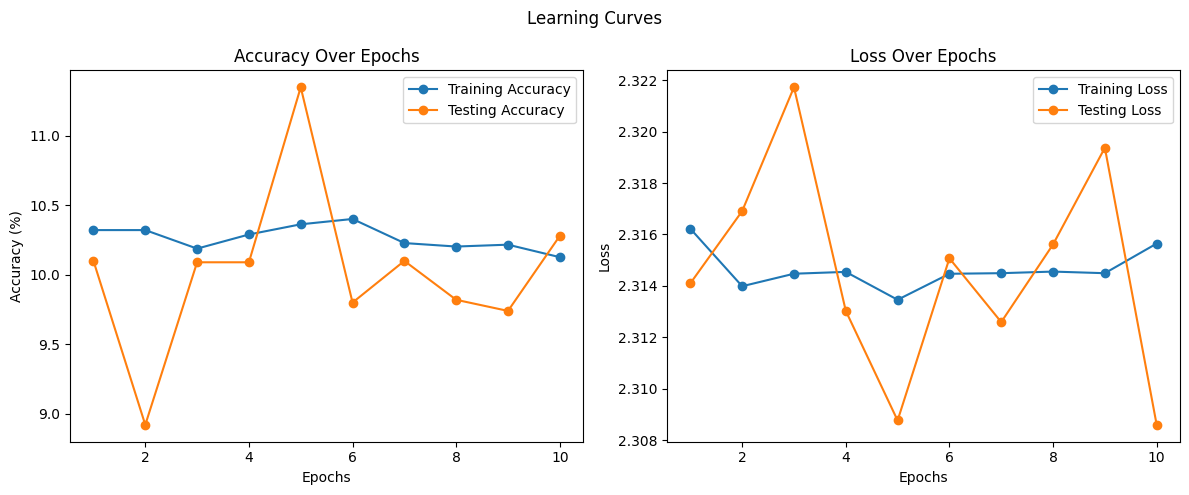

In [ ]:
phase1_sig_l4()

In [24]:
from sklearn.model_selection import train_test_split

def get_pet_dataset():
    img_dim=64
    transforms_s = transforms.Compose([
        transforms.Resize((img_dim, img_dim)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])
    full_dataset = torchvision.datasets.OxfordIIITPet(root='./data/oxford-pets', download=True,transform=transforms_s)

    train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [0.8, 0.2], generator=torch.Generator().manual_seed(42))


    return train_dataset, test_dataset

In [7]:
from torchvision import transforms

transform = transforms.Compose([
    # you can add other transformations in this list
    transforms.ToTensor()
])

In [8]:
train,test = get_pet_dataset()
print(len(train))
print(len(test))

100%|██████████| 791918971/791918971 [00:27<00:00, 28556236.41it/s]


Extracting data/oxford-pets/oxford-iiit-pet/images.tar.gz to data/oxford-pets/oxford-iiit-pet


100%|██████████| 19173078/19173078 [00:01<00:00, 14460824.97it/s]


Extracting data/oxford-pets/oxford-iiit-pet/annotations.tar.gz to data/oxford-pets/oxford-iiit-pet
2760
920


In [ ]:
resnet = resnet18(pretrained=True)

resnet.to(device)
mobilenet = mobilenet_v2(pretrained=True)
mobilenet.to(device)

googlenet = googlenet(pretrained=True)

googlenet.to(device)



# Print the layer names for ResNet-18
print("ResNet-18 layer names:")
for name, _ in resnet.named_modules():
    if isinstance(_, torch.nn.Conv2d) or isinstance(_, torch.nn.Linear):
        print(name)

# Print the layer names for MobileNet V2
print("\nMobileNet V2 layer names:")
for name, _ in mobilenet.named_modules():
    if isinstance(_, torch.nn.Conv2d) or isinstance(_, torch.nn.Linear):
        print(name)

# Print the layer names for GoogleNet
print("\nGoogleNet layer names:")
for name, _ in googlenet.named_modules():
    if isinstance(_, torch.nn.Conv2d) or isinstance(_, torch.nn.Linear):
        print(name)

In [10]:
def extract_features(model, layer, data_loader):
    features = torch.Tensor().to(device)
    labels = torch.LongTensor().to(device)

    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        for images, batch_labels in data_loader:
            images = images.to(device)
            batch_features = model(images)

            # If the layer is a string, find the corresponding layer module
            if isinstance(layer, str):
                layer = dict(model.named_modules())[layer]

            batch_features = layer.view(layer.size(0), -1)  # Flatten the features
            features = torch.cat((features, batch_features.cpu()))
            labels = torch.cat((labels, batch_labels.cpu()))

    return features, labels

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
def calculate_confusion_matrix(test_labels, predictions):
    # Calculate confusion matrix
    cm = confusion_matrix(test_labels, predictions)

    # Visualize the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from torchvision.models import resnet18, mobilenet_v2, googlenet

def phase2():
    train_dataset, test_dataset = get_pet_dataset()
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=2)

    resnet = resnet18(pretrained=True)
    modules_resnet = list(resnet.children())[:-1]  # Remove the last fully connected layer
    resnet_custom = torch.nn.Sequential(*modules_resnet)
    resnet_custom.to(device)

    mobilenet_pretrained = mobilenet_v2(pretrained=True)
    mobilenet_pretrained.features[-1] = torch.nn.AdaptiveAvgPool2d(output_size=1)  # Change the average pooling to global pooling
    mobilenet_pretrained.to(device)

    googlenet_pretrained = googlenet(pretrained=True)
    modules_googlenet = list(googlenet_pretrained.children())[:-2]  # Remove the last two layers
    googlenet_custom = torch.nn.Sequential(*modules_googlenet)
    googlenet_custom.to(device)

    resnet_layer = ["avgpool","layer1","layer3"]
    mobilenet_layer = ["features.0","features.7","avgpool"]
    googlenet_layer = ["avgpool","inception3b","inception4e"]
    resnet_features1, train_labels = extract_features(resnet_custom, resnet_layer[0], train_loader)
    mobilenet_features1, _ = extract_features(mobilenet_pretrained, mobilenet_layer[0], train_loader)
    googlenet_features1, _ = extract_features(googlenet_custom, googlenet_layer[0], train_loader)
    resnet_features2, _ = extract_features(resnet_custom, resnet_layer[1], train_loader)
    mobilenet_features2, _ = extract_features(mobilenet_pretrained, mobilenet_layer[1], train_loader)
    googlenet_features2, _ = extract_features(googlenet_custom, googlenet_layer[1], train_loader)
    resnet_features3, _ = extract_features(resnet_custom, resnet_layer[2], train_loader)
    mobilenet_features3, _ = extract_features(mobilenet_pretrained, mobilenet_layer[2], train_loader)
    googlenet_features3, _ = extract_features(googlenet_custom, googlenet_layer[2], train_loader)
    train_features = torch.cat((resnet_features1, mobilenet_features1, googlenet_features1,resnet_features2, mobilenet_features2,
                                googlenet_features2,resnet_features3, mobilenet_features3, googlenet_features3), dim=1)
    svm_classifier = SVC(kernel='rbf')
    svm_classifier.fit(train_features, train_labels)

    test_resnet_features1, test_labels = extract_features(resnet_custom, resnet_layer[0], train_loader)
    test_mobilenet_features1, _ = extract_features(mobilenet_pretrained, mobilenet_layer[0], train_loader)
    test_googlenet_features1, _ = extract_features(googlenet_custom, googlenet_layer[0], train_loader)
    test_resnet_features2, _ = extract_features(resnet_custom, resnet_layer[1], train_loader)
    test_mobilenet_features2, _ = extract_features(mobilenet_pretrained, mobilenet_layer[1], train_loader)
    test_googlenet_features2, _ = extract_features(googlenet_custom, googlenet_layer[1], train_loader)
    test_resnet_features3, _ = extract_features(resnet_custom, resnet_layer[2], train_loader)
    test_mobilenet_features3, _ = extract_features(mobilenet_pretrained, mobilenet_layer[2], train_loader)
    test_googlenet_features3, _ = extract_features(googlenet_custom, googlenet_layer[2], train_loader)

    test_features = torch.cat((test_resnet_features1, test_mobilenet_features1, test_googlenet_features1,test_resnet_features2, test_mobilenet_features2,
                                test_googlenet_features2,test_resnet_features3, test_mobilenet_features3, test_googlenet_features3), dim=1)

      # Predict labels for test data
    predictions = svm_classifier.predict(test_features)

    # Calculate accuracy
    accuracy = accuracy_score(test_labels, predictions)
    print(f"Accuracy: {accuracy}")

    calculate_confusion_matrix(test_labels, predictions)


In [26]:
phase2()

KeyError: 'avgpool'